# Analysis of Marketing Campaign and its effect on Sales.

The Dataset used was obtained from https://www.kaggle.com/datasets/jackdaoud/marketing-data. 

In [74]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#import Dataset
df=pd.read_csv("G:\Data science\Datasets\marketing.csv",sep=';')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


Data include year of birth, education, marital status of the customer, as well as various marketing information, including:

    1.AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
    2.AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
    3.AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
    4.AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
    5.AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
    6.Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
    7.Complain - 1 if customer complained in the last 2 years
    8.DtCustomer - date of customer’s enrolment with the company
    9.Education - customer’s level of education
    10.Marital - customer’s marital status
    11.Kidhome - number of small children in customer’s household
    12.Teenhome - number of teenagers in customer’s household
    13.Income - customer’s yearly household income
    14.MntFishProducts - amount spent on fish products in the last 2 years
    15.MntMeatProducts - amount spent on meat products in the last 2 years
    16.MntFruits - amount spent on fruits products in the last 2 years
    17.MntSweetProducts - amount spent on sweet products in the last 2 years
    18.MntWines - amount spent on wine products in the last 2 years
    19.MntGoldProds - amount spent on gold products in the last 2 years
    20.NumDealsPurchases - number of purchases made with discount
    21.NumCatalogPurchases - number of purchases made using catalogue
    22.NumStorePurchases - number of purchases made directly in stores
    23.NumWebPurchases - number of purchases made through company’s web site
    24.NumWebVisitsMonth - number of visits to company’s web site in the last month
    25.Recency - number of days since the last purchase

In [3]:
#basic information on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

As can be seen from the previous information, the Income column contains the missing data (2240 - 2216 = 24 NaN values).

In [4]:
#filling missing values
df.Income=df.Income.fillna(0)

In [5]:
#segregate educational backgrounds
pd.DataFrame(df.Education.value_counts())

,Education
Graduation,1127
PhD,486
Master,370
2n Cycle,203
Basic,54


The customers are with 5 different types of education in this dataset

In [6]:
#marital status
pd.DataFrame(df.Marital_Status.value_counts())

,Marital_Status
Married,864
Together,580
Single,480
Divorced,232
Widow,77
Alone,3
Absurd,2
YOLO,2


There are 8 types of maritial status in this dataset.

In [7]:
#changing data type of columns
#Marital status and Education are categorical 
df[['Education','Marital_Status']]=df[['Education','Marital_Status']].astype('category')
df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'])
df[['Education','Marital_Status','Dt_Customer']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Education       2240 non-null   category      
 1   Marital_Status  2240 non-null   category      
 2   Dt_Customer     2240 non-null   datetime64[ns]
dtypes: category(2), datetime64[ns](1)
memory usage: 22.6 KB


In [8]:
#Statistical analysis
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,51687.459375,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25609.342730,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,34722.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51075.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [9]:
df.describe(include='category')

,Education,Marital_Status
count,2240,2240
unique,5,8
top,Graduation,Married
freq,1127,864


The most active customers are married people with secondary education.

In [10]:
#percentage of customers by education
pd.options.display.float_format='{:.1f}%'.format
edu=df.Education.value_counts(normalize=True)
edu*100

Graduation   50.3%
PhD          21.7%
Master       16.5%
2n Cycle      9.1%
Basic         2.4%
Name: Education, dtype: float64

Thus the most active customers are people with secondary education, then - PhDs, and people with a master's degree.

In [11]:
#distribution of education and marital status
pd.crosstab(df.Education,df.Marital_Status,normalize=True)*100

Marital_Status,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
Education,,,,,,,,
2n Cycle,0.0%,0.0%,1.0%,3.6%,1.7%,2.5%,0.2%,0.0%
Basic,0.0%,0.0%,0.0%,0.9%,0.8%,0.6%,0.0%,0.0%
Graduation,0.0%,0.0%,5.3%,19.3%,11.2%,12.8%,1.6%,0.0%
Master,0.0%,0.0%,1.7%,6.2%,3.3%,4.7%,0.5%,0.0%
PhD,0.0%,0.0%,2.3%,8.6%,4.4%,5.2%,1.1%,0.1%


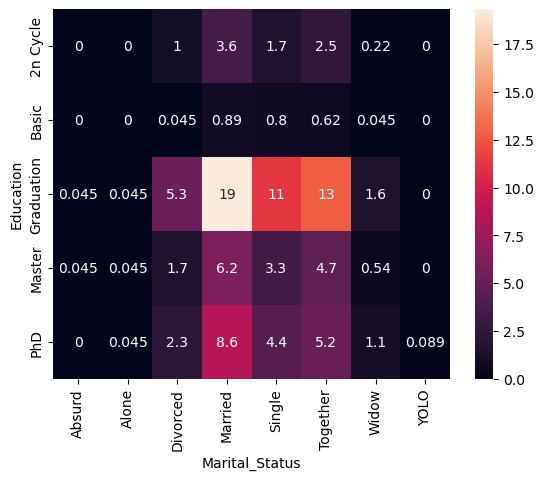

In [12]:
#better visualization
sns.heatmap((pd.crosstab(df.Education,df.Marital_Status,normalize=True)*100),annot=True);

Here, married (officially or informally) and single customers with secondary education consists the largest percentage of persons. It can also be seen that people with the specified marital status are the most active customers.

In [16]:
#First marketing campaign relationship with education
pd.crosstab(df.Education,df.AcceptedCmp1,normalize=True,margins=True,margins_name='Total')*100

AcceptedCmp1,0,1,Total
Education,,,
2n Cycle,8.4%,0.6%,9.1%
Basic,2.4%,0.0%,2.4%
Graduation,46.7%,3.7%,50.3%
Master,15.7%,0.8%,16.5%
PhD,20.4%,1.3%,21.7%
Total,93.6%,6.4%,100.0%


As we can see, the first marketing campaign attracted people with secondary education the most.This may indicate that the marketing campaign is aimed at highly intelligent people.

However it can be seen that the company attracted only 6.4% of customers in First campaign.

In [17]:
#First marketing campaign relationship with marital status
pd.crosstab(df.Marital_Status,df.AcceptedCmp1,normalize=True,margins=True,margins_name='Total')*100

AcceptedCmp1,0,1,Total
Marital_Status,,,
Absurd,0.0%,0.0%,0.1%
Alone,0.1%,0.0%,0.1%
Divorced,9.8%,0.5%,10.4%
Married,35.8%,2.8%,38.6%
Single,20.0%,1.4%,21.4%
Together,24.5%,1.4%,25.9%
Widow,3.2%,0.2%,3.4%
YOLO,0.1%,0.0%,0.1%
Total,93.6%,6.4%,100.0%


In [20]:
#First marketing campaign relationship with education and marital status
df.pivot_table(index="Education",columns="Marital_Status",values='AcceptedCmp1',aggfunc='sum')

Marital_Status,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
Education,,,,,,,,
2n Cycle,0,0,1,8,3,1,1,0
Basic,0,0,0,0,0,0,0,0
Graduation,1,0,9,33,13,24,2,0
Master,0,0,1,9,4,2,2,0
PhD,0,0,1,13,11,5,0,0


In [27]:
#comparing the influence of different campaigns
dfa1 = df[df['AcceptedCmp1']>0]
dfa1['AcceptedCmp'] = 1
dfa2 = df[df['AcceptedCmp2']>0]
dfa2['AcceptedCmp'] = 2
dfa3 = df[df['AcceptedCmp3']>0]
dfa3['AcceptedCmp'] = 3
dfa4 = df[df['AcceptedCmp4']>0]
dfa4['AcceptedCmp'] = 4
dfa5 = df[df['AcceptedCmp5']>0]
dfa5['AcceptedCmp'] = 5

C:\Users\Happy\AppData\Local\Temp\ipykernel_8712\4097127491.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa1['AcceptedCmp'] = 1
C:\Users\Happy\AppData\Local\Temp\ipykernel_8712\4097127491.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa2['AcceptedCmp'] = 2
C:\Users\Happy\AppData\Local\Temp\ipykernel_8712\4097127491.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [28]:
dfa = dfa1.append(dfa2)
dfa = dfa.append(dfa3)
dfa = dfa.append(dfa4)
dfa = dfa.append(dfa5)
dfa

C:\Users\Happy\AppData\Local\Temp\ipykernel_8712\1444202272.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfa = dfa1.append(dfa2)
C:\Users\Happy\AppData\Local\Temp\ipykernel_8712\1444202272.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfa = dfa.append(dfa3)
C:\Users\Happy\AppData\Local\Temp\ipykernel_8712\1444202272.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfa = dfa.append(dfa4)
C:\Users\Happy\AppData\Local\Temp\ipykernel_8712\1444202272.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfa = dfa.append(dfa5)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,AcceptedCmp
15,2114,1946,PhD,Single,82800.0%,0,0,2012-11-24,23,1006,...,0,0,1,1,0,0,3,11,1,1
18,6565,1949,Master,Married,76995.0%,0,1,2013-03-28,91,1012,...,0,0,0,1,0,0,3,11,0,1
53,2225,1977,Graduation,Divorced,82582.0%,0,0,2014-06-07,54,510,...,1,0,0,1,0,0,3,11,1,1
67,9369,1979,2n Cycle,Single,88194.0%,0,1,2014-03-19,19,688,...,1,0,0,1,0,0,3,11,1,1
87,4452,1957,Graduation,Single,50388.0%,0,1,2014-05-28,3,292,...,0,1,0,1,0,0,3,11,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2168,10394,1984,Graduation,Married,90000.0%,0,0,2013-12-23,91,675,...,1,0,1,1,0,0,3,11,0,5
2171,3968,1970,2n Cycle,Divorced,65706.0%,0,0,2013-06-28,77,918,...,0,1,1,0,1,0,3,11,1,5
2175,1772,1975,PhD,Married,79174.0%,0,0,2013-01-11,2,1074,...,0,0,1,1,0,0,3,11,1,5
2187,5721,1956,PhD,Married,84117.0%,0,0,2014-05-11,60,611,...,0,0,1,0,0,0,3,11,0,5


In [30]:
dfa['AcceptedCmp'].value_counts(normalize=True).sort_index()*100

1   21.6%
2    4.5%
3   24.4%
4   25.0%
5   24.4%
Name: AcceptedCmp, dtype: float64

The most successful were 1, 3, 4 and 5 marketing campaigns. Their effectiveness is about the same level.

In [34]:
# impact of marketing campaigns on different age groups
present=pd.Timestamp('now').year
age=present-dfa.Year_Birth
age

15      77
18      74
53      46
67      44
87      66
        ..
2168    39
2171    53
2175    48
2187    67
2221    41
Name: Year_Birth, Length: 667, dtype: int64

In [47]:
bins=[0,30,40,50,60,100]
dfa['Age']=pd.cut(age,bins)
dfa['Age']

15      (60, 100]
18      (60, 100]
53       (40, 50]
67       (40, 50]
87      (60, 100]
          ...    
2168     (30, 40]
2171     (50, 60]
2175     (40, 50]
2187    (60, 100]
2221     (40, 50]
Name: Age, Length: 667, dtype: category
Categories (5, interval[int64, right]): [(0, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 100]]

In [49]:
dfa['Age'].value_counts()

(60, 100]    229
(40, 50]     164
(50, 60]     160
(30, 40]     103
(0, 30]       10
Name: Age, dtype: int64

People above age 40 are the most susceptible to marketing campaigns.

# Visualization

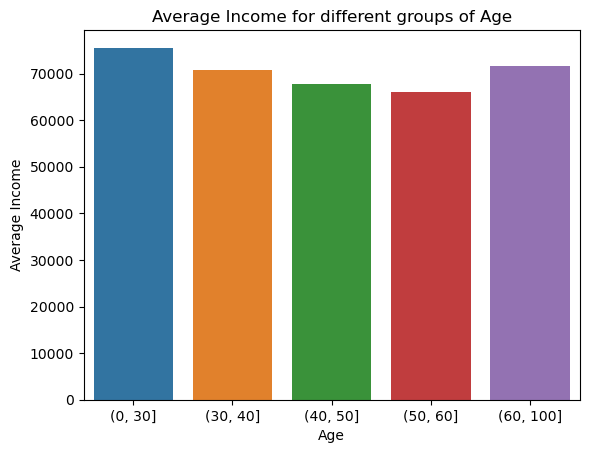

In [52]:
#average income received by different age groups of customers
ageIncome = dfa.groupby(['Age'])['Income'].mean().reset_index()
sns.barplot(data = ageIncome[['Age', 'Income']], x = "Age", y = "Income")
plt.xlabel('Age')
plt.ylabel('Average Income')
plt.title('Average Incomе for different groups of Age')
plt.show()

As we can see, young people and the elderly have the highest incomes.

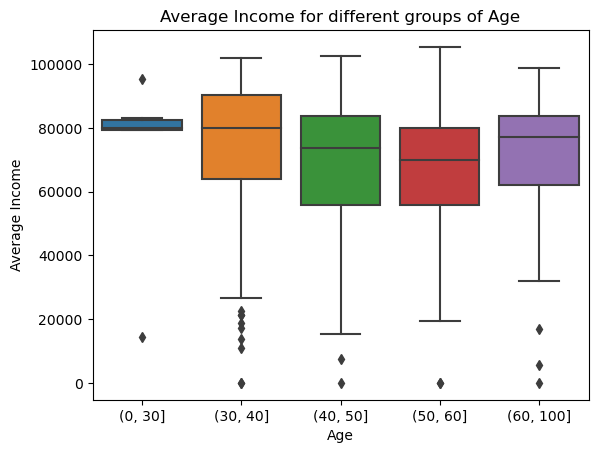

In [54]:
#boxplot
sns.boxplot(x = "Age", y = "Income", data=dfa)
plt.xlabel('Age')
plt.ylabel('Average Income')
plt.title('Average Incomе for different groups of Age')
plt.show()

As we can see, young people on average receive about the same income. People between the ages of 40 and 50 have the largest income disparities. The maximum income in all groups is about the same except for young people.

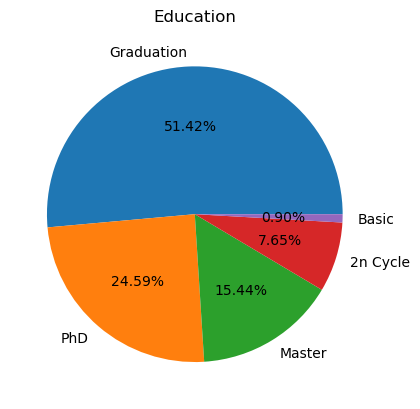

In [85]:
#education distribution
size = dfa['Education'].value_counts(normalize=True)
plt.pie(size,autopct = "%.2f%%", labels=size.index)
plt.title('Education')
plt.show()

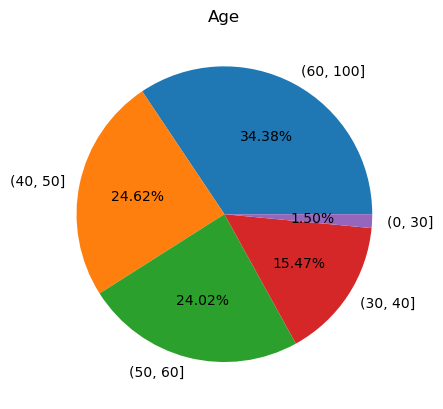

In [67]:
#age distribution
ages = dfa['Age'].value_counts(normalize=True)
plt.pie(ages,autopct = "%.2f%%", labels=ages.index)
plt.title('Age')
plt.show()

Text(0.5, 1.0, 'Sales Percentage of Campaigns')

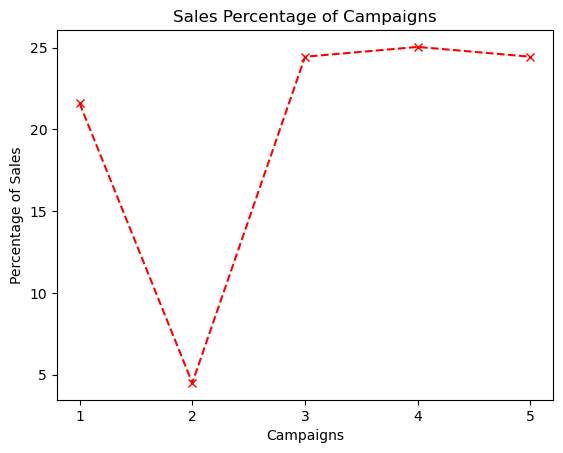

In [83]:
#campaign
data=dfa['AcceptedCmp'].value_counts(normalize=True).sort_index()*100
plt.plot(data,'x--r')
plt.xticks([1,2,3,4,5])
plt.xlabel("Campaigns")
plt.ylabel("Percentage of Sales")
plt.title("Sales Percentage of Campaigns")

## Key Findings

    1.People above age 40 are the most susceptible to marketing campaigns.
    2.Married (officially or informally) and single customers with secondary education consists the largest percentage of Customers. It can also be seen that people with the specified marital status are the most active customers.
    3.The most active customers are people with secondary education, then - PhDs, and people with a master's degree.
    4.Young people and the elderly have the highest incomes.
    5.People between the ages of 40 and 50 have the largest income disparities. The maximum income in all groups is about the same except for young people.
    6.The most successful were 1, 3, 4 and 5 marketing campaigns. Their effectiveness is about the same level.
